Initial setup

In [2]:
%load_ext autoreload
%autoreload 2

#modules for setting the path
import os
import sys
module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

#modules for opening the data
import psycopg2
import pandas as pd
from src.data import local

#Retrieving postgres info
PORT = local.port
USER = local.user
HOST = local.host
PASSWORD = local.password

DBNAME = "opportunity_youth"

In [3]:
conn = psycopg2.connect(dbname=DBNAME, user=USER, password=PASSWORD, port=PORT, host=HOST)

<h1>First let's take a look at the puma_names_2010 table.</h1>

In [5]:
query = """
SELECT *
FROM puma_names_2010
"""

puma_names_table = pd.read_sql(query, conn)

puma_names_table.head()

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,1,Alabama ...,1,100,100100,G01000100,"Lauderdale, Colbert, Franklin & Marion (Northe..."
1,1,Alabama ...,1,800,100800,G01000800,St. Clair & Blount Counties ...
2,1,Alabama ...,1,1400,101400,G01001400,"Walker, Marion (South & West), Fayette & Lamar..."
3,1,Alabama ...,1,1500,101500,G01001500,Tuscaloosa (Outer) & Pickens Counties--Northpo...
4,1,Alabama ...,1,1600,101600,G01001600,Tuscaloosa & Northport (Southeast) Cities ...


Let's see if we can find south king county

In [6]:
query = """
SELECT *
FROM puma_names_2010
WHERE puma_name LIKE '%King%'
"""

skc_search = pd.read_sql(query, conn)

skc_search

,state_fips,state_name,cpuma0010,puma,geoid,gisjoin,puma_name
0,6,California ...,69,3100,603100,G06003100,Kings County--Hanford City ...
1,25,Massachusetts ...,457,4903,2504903,G25004903,"Plymouth County (East)--Plymouth, Marshfield, ..."
2,36,New York ...,702,3701,3603701,G36003701,"NYC-Bronx Community District 8--Riverdale, Fie..."
3,42,Pennsylvania ...,862,801,4200801,G42000801,Luzerne County (East)--Kingston Borough ...
4,42,Pennsylvania ...,889,3103,4203103,G42003103,Montgomery County (Southwest)--King of Prussia...
5,47,Tennessee ...,931,1000,4701000,G47001000,Hawkins & Sullivan (Northwest) Counties--Kings...
6,51,Virginia ...,1017,51215,5151215,G51051215,"Hanover, Powhatan, Goochland, New Kent, King W..."
7,53,Washington ...,1044,11606,5311606,G53011606,"King County (Northwest)--Shoreline, Kenmore & ..."
8,53,Washington ...,1044,11607,5311607,G53011607,"King County (Northwest)--Redmond, Kirkland Cit..."
9,53,Washington ...,1044,11608,5311608,G53011608,King County (Northwest Central)--Greater Belle...


It looks like King County is listed here but there are multiple entries for the southern part of king county. We may need to compare the puma_name descriptions with a clear definition of 'South King County'. We may need to compare with the Roadmap data brief.

<h1>wa_geo_xwalk exploration</h1>

In [8]:
query = """
SELECT *
FROM wa_geo_xwalk
LIMIT 10
"""

skc_search = pd.read_sql(query, conn)

skc_search.columns

Index(['tabblk2010', 'st', 'stusps', 'stname', 'cty', 'ctyname', 'trct',
       'trctname', 'bgrp', 'bgrpname', 'cbsa', 'cbsaname', 'zcta', 'zctaname',
       'stplc', 'stplcname', 'ctycsub', 'ctycsubname', 'stcd116',
       'stcd116name', 'stsldl', 'stsldlname', 'stsldu', 'stslduname',
       'stschool', 'stschoolname', 'stsecon', 'dtseconname', 'trib',
       'tribname', 'tsub', 'tsubname', 'stanrc', 'stanrcname', 'necta',
       'nectname', 'mil', 'milname', 'stwib', 'stwibname', 'blklatdd',
       'blklondd', 'createdate'],
      dtype='object')

In [9]:
skc_search.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tabblk2010    10 non-null     object 
 1   st            10 non-null     object 
 2   stusps        10 non-null     object 
 3   stname        10 non-null     object 
 4   cty           10 non-null     object 
 5   ctyname       10 non-null     object 
 6   trct          10 non-null     object 
 7   trctname      10 non-null     object 
 8   bgrp          10 non-null     object 
 9   bgrpname      10 non-null     object 
 10  cbsa          10 non-null     object 
 11  cbsaname      10 non-null     object 
 12  zcta          10 non-null     object 
 13  zctaname      10 non-null     object 
 14  stplc         10 non-null     object 
 15  stplcname     4 non-null      object 
 16  ctycsub       10 non-null     object 
 17  ctycsubname   10 non-null     object 
 18  stcd116       10 non-null     obj

Looks like wa_geo_xwalk contaings tracts under the 'trct' and 'trctname' columns as well as longitude and latitude info under the 'blklatdd' and 'blklondd' columns.

In [10]:
query = """
SELECT st, stname, cty, ctyname
FROM wa_geo_xwalk
"""

skc_search = pd.read_sql(query, conn)

In [11]:
print(skc_search.stname.unique())

['Washington                                                                                          '
 'Oregon                                                                                              '
 'Idaho                                                                                               ']


It only covers the above 3 states.

<h1>pums_2017</h1>

In [14]:
query="""
SELECT p.puma, rtrim(puma_name), agep, SUM(pwgtp) as Weighted_Total
FROM pums_2017 p
JOIN puma_names_2010 n on p.puma = n.puma
WHERE state_name = 'Washington'
AND puma_name LIKE ('King%South%')
AND puma_name NOT LIKE ('%North%')
AND agep BETWEEN 16 AND 24
GROUP BY agep, rtrim(puma_name), p.puma
ORDER BY agep DESC
"""

weighted_totals = pd.read_sql(query, conn)

In [74]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            indp,
            povpip,
            SUM(pwgtp) as Weighted_Total
            FROM pums_2017 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            GROUP BY school, education_attainment, disability_status, employment_status, Parent_employment, indp, povpip,
                     agep, sex, rtrim(puma_name), p.puma
            ORDER BY school, agep DESC"""

skc_youth_2017 = pd.read_sql(query, conn)

In [75]:
skc_youth_2017

,puma,rtrim,agep,school,education_attainment,disability_status,parent_employment,employment_status,gender,indp,povpip,weighted_total
0,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0280,263.0,14.0
1,11615,"King County (Southeast)--Maple Valley, Covingt...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,249.0,13.0
2,11610,"King County (Central)--Renton City, Fairwood, ...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,267.0,14.0
3,11613,King County (Southwest Central)--Kent City,24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,298.0,20.0
4,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,330.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3300,11614,King County (Southwest)--Auburn City & Lakeland,16.0,public or private school or college and homesc...,No HS or GED,reported disability,None,Unemployed/not in labor force,male,None,6.0,12.0
3301,11611,"King County (West Central)--Burien, SeaTac, Tu...",16.0,public or private school or college and homesc...,No HS or GED,reported disability,None,Unemployed/not in labor force,male,None,69.0,13.0
3302,11613,King County (Southwest Central)--Kent City,16.0,public or private school or college and homesc...,post HS education,no reported disability,One or both parents in labor force,Unemployed/not in labor force,male,7890,63.0,24.0
3303,11614,King County (Southwest)--Auburn City & Lakeland,16.0,public or private school or college and homesc...,post HS education,no reported disability,None,Unemployed/not in labor force,male,9920,98.0,27.0


In [76]:
query = """
            SELECT p.puma, rtrim(puma_name), agep,
            CASE WHEN p.sch = '1' THEN 'Has not attended in last 3 months'
                 WHEN p.sch IN ('2','3') THEN 'public or private school or college and homeschool'
                 END as School,
            CASE WHEN p.schl in ('16','17') THEN 'HS diploma or GED'
                 WHEN p.schl in ('18','19','20','21','22','23','24') THEN 'post HS education'
                 ELSE 'No HS or GED'
                 END as Education_attainment,
            CASE WHEN p.dis = '1' THEN 'reported disability'
                 ELSE 'no reported disability'
                 END as disability_status,
            CASE WHEN p.esp in ('1','2','3','5','6','7','8') THEN 'One or both parents in labor force'
                 WHEN p.esp = '4' THEN 'Neither parent in labor force'
                 END as Parent_employment,
            CASE WHEN p.esr in ('1','2') THEN 'employed'
                 WHEN p.esr in ('3','6') THEN 'Unemployed/not in labor force'
                 WHEN p.esr IN ('4','5') THEN 'Armed Forces'
                 END as Employment_status,
            CASE WHEN p.sex = '1' THEN 'male'
                 ELSE 'female'
                 END as gender,
            indp,
            povpip,
            SUM(pwgtp) as Weighted_Total
            FROM pums_2018 p
            JOIN puma_names_2010 n on p.puma = n.puma
            WHERE state_name = 'Washington'
            AND p.puma IN ('11610', '11611', '11612', '11613', '11614', '11615')
            AND agep BETWEEN 16 AND 24
            GROUP BY school, education_attainment, disability_status, employment_status, Parent_employment, indp, povpip,
                     agep, sex, rtrim(puma_name), p.puma
            ORDER BY school, agep DESC"""

skc_youth_2018 = pd.read_sql(query, conn)

In [77]:
skc_youth_2018

,puma,rtrim,agep,school,education_attainment,disability_status,parent_employment,employment_status,gender,indp,povpip,weighted_total
0,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0280,263.0,13.0
1,11615,"King County (Southeast)--Maple Valley, Covingt...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,249.0,14.0
2,11610,"King County (Central)--Renton City, Fairwood, ...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,267.0,15.0
3,11613,King County (Southwest Central)--Kent City,24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,298.0,18.0
4,11611,"King County (West Central)--Burien, SeaTac, Tu...",24.0,Has not attended in last 3 months,HS diploma or GED,no reported disability,None,employed,male,0770,330.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3288,11614,King County (Southwest)--Auburn City & Lakeland,16.0,public or private school or college and homesc...,No HS or GED,reported disability,None,Unemployed/not in labor force,male,None,6.0,11.0
3289,11613,King County (Southwest Central)--Kent City,16.0,public or private school or college and homesc...,post HS education,no reported disability,One or both parents in labor force,Unemployed/not in labor force,male,7890,63.0,24.0
3290,11615,"King County (Southeast)--Maple Valley, Covingt...",16.0,public or private school or college and homesc...,post HS education,no reported disability,One or both parents in labor force,Unemployed/not in labor force,female,None,501.0,20.0
3291,11614,King County (Southwest)--Auburn City & Lakeland,16.0,public or private school or college and homesc...,post HS education,no reported disability,None,Unemployed/not in labor force,male,9920,98.0,30.0


In [78]:
skc_youth_2018.weighted_total.sum()

85375.0

In [79]:
skc_oy_2018 = skc_youth_2018[(skc_youth_2018['school'] == 'Has not attended in last 3 months') &
             (skc_youth_2018['employment_status'] == 'Unemployed/not in labor force')]

skc_oy_2017 = skc_youth_2017[(skc_youth_2017['school'] == 'Has not attended in last 3 months') &
             (skc_youth_2017['employment_status'] == 'Unemployed/not in labor force')]

In [80]:
oy_2018 = skc_oy_2018.weighted_total.sum()
oy_2017 = skc_oy_2017.weighted_total.sum()

In [81]:
import matplotlib.pyplot as plt

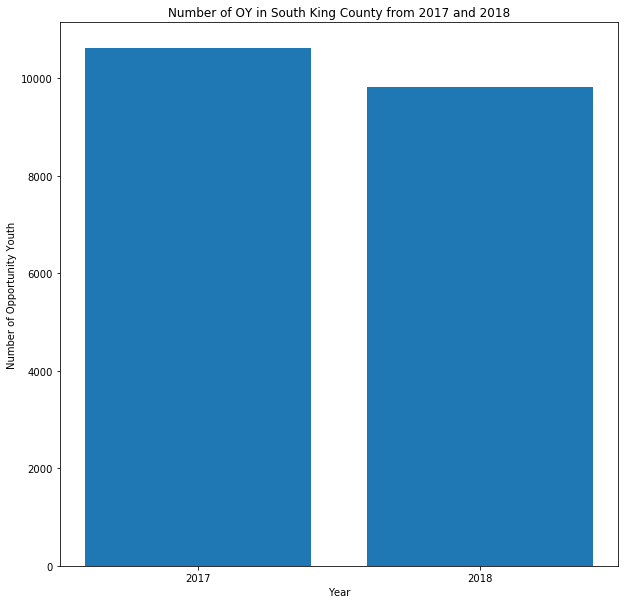

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Opportunity Youth')
ax.set_title('Number of OY in South King County from 2017 and 2018')
ax.bar(x=['2017', '2018'], height = [oy_2017, oy_2018]);


In [93]:
total_2017 = skc_youth_2017.weighted_total.sum()
total_2018 = skc_youth_2018.weighted_total.sum()

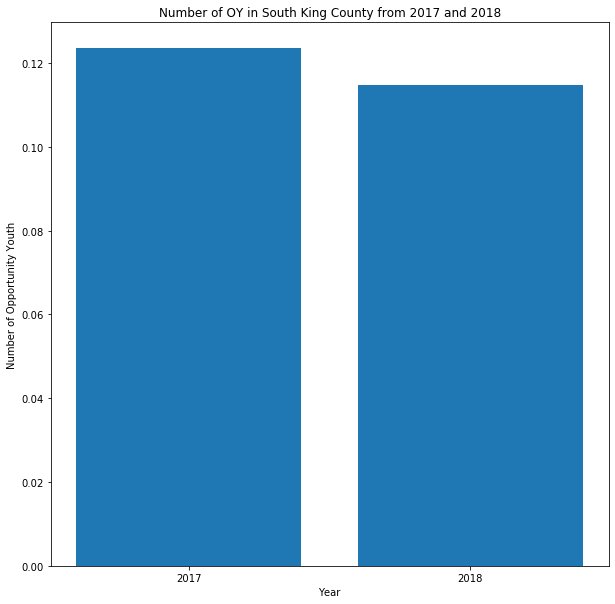

In [94]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('Year')
ax.set_ylabel('Number of Opportunity Youth')
ax.set_title('Number of OY in South King County from 2017 and 2018')
ax.bar(x=['2017', '2018'], height = [oy_2017/total_2017, oy_2018/total_2018]);

